In [3]:
import struct

In [4]:
input_filename="elevation1x1_new-mer-bleue.bmp"

bmp = open(input_filename, 'rb') # open a binary file
print('-- First part of the header, information about the file (14 bytes)')
print('Type:', bmp.read(2).decode())
print('Size: %s' % struct.unpack('I', bmp.read(4)))
print('Reserved 1: %s' % struct.unpack('H', bmp.read(2)))
print('Reserved 2: %s' % struct.unpack('H', bmp.read(2)))
offset=struct.unpack('I', bmp.read(4))
print('Image start after Offset: %s' % offset)

print('-- Second part of the header, DIB header, bitmap information header (varying size)')
print('The size of this DIB Header Size: %s' % struct.unpack('I', bmp.read(4)))
print('Width: %s' % struct.unpack('I', bmp.read(4)))
print('Height: %s' % struct.unpack('I', bmp.read(4)))
print('Colour Planes: %s' % struct.unpack('H', bmp.read(2)))
pixel_size=struct.unpack('H', bmp.read(2))
print('Bits per Pixel: %s' % pixel_size)
print('Compression Method: %s' % struct.unpack('I', bmp.read(4)))
print('Raw Image Size: %s' % struct.unpack('I', bmp.read(4)))
print('Horizontal Resolution: %s' % struct.unpack('I', bmp.read(4)))
print('Vertical Resolution: %s' % struct.unpack('I', bmp.read(4)))
print('Number of Colours: %s' % struct.unpack('I', bmp.read(4)))
print('Important Colours: %s' % struct.unpack('I', bmp.read(4)))

-- First part of the header, information about the file (14 bytes)
Type: BM
Size: 62506760
Reserved 1: 0
Reserved 2: 0
Image start after Offset: 54
-- Second part of the header, DIB header, bitmap information header (varying size)
The size of this DIB Header Size: 40
Width: 4901
Height: 4251
Colour Planes: 1
Bits per Pixel: 24
Compression Method: 0
Raw Image Size: 62506706
Horizontal Resolution: 2834
Vertical Resolution: 2834
Number of Colours: 0
Important Colours: 0


In [5]:
# At this step, we have read 14+40 bytes
# As offset[0] = 54, from now, we will read the BMP content
# You have to read each pixel now, and do what you have to do
# First pixel is bottom-left, and last one top-right
# .........
bmp.close()

In [6]:
from PIL import Image
import numpy as np
im = Image.open(input_filename)

In [7]:
# This modules gives useful informations
width=im.size[0]
heigth=im.size[1]
print("width", width)
print("height", heigth)
colors = im.getcolors(width*heigth)
print('Nb of different colors: %d' % len(colors))
print("color", colors)
# To plot an histogram
print("-----------------------------------------------------------------")
from matplotlib import pyplot as plt
def hexencode(rgb):
    r=rgb[0]
    g=rgb[1]
    b=rgb[2]
#     print('#%02x%02x%02x' % (r,g,b))
    return '#%02x%02x%02x' % (r,g,b)

for idx, c in enumerate(colors):
#     print("idx",idx)
#     print("c",c)
    plt.bar(idx, c[0], color=hexencode(c[1]))

plt.show()

width 4901
height 4251
Nb of different colors: 189
color [(8664897, (1, 185, 253)), (118819, (246, 234, 175)), (39233, (244, 234, 175)), (37409, (244, 233, 175)), (43408, (244, 232, 175)), (40791, (243, 232, 174)), (87557, (241, 232, 173)), (42131, (244, 231, 173)), (46675, (240, 232, 172)), (50494, (238, 232, 172)), (48322, (238, 230, 172)), (82946, (243, 229, 172)), (38867, (241, 227, 172)), (54018, (236, 231, 170)), (52412, (236, 230, 170)), (37399, (235, 230, 170)), (38193, (241, 226, 170)), (78753, (233, 229, 169)), (40288, (232, 229, 169)), (37545, (240, 224, 169)), (37588, (240, 223, 169)), (36900, (238, 222, 169)), (42518, (230, 229, 167)), (41686, (230, 227, 167)), (43455, (229, 227, 167)), (37619, (238, 221, 167)), (122213, (236, 219, 167)), (90803, (227, 226, 166)), (96194, (226, 226, 165)), (50601, (225, 226, 165)), (106717, (223, 224, 164)), (74072, (235, 216, 164)), (35255, (233, 215, 164)), (55407, (221, 224, 163)), (56893, (220, 223, 163)), (118249, (219, 223, 163)), (4

<Figure size 640x480 with 1 Axes>

In [8]:
colors

[(8664897, (1, 185, 253)),
 (118819, (246, 234, 175)),
 (39233, (244, 234, 175)),
 (37409, (244, 233, 175)),
 (43408, (244, 232, 175)),
 (40791, (243, 232, 174)),
 (87557, (241, 232, 173)),
 (42131, (244, 231, 173)),
 (46675, (240, 232, 172)),
 (50494, (238, 232, 172)),
 (48322, (238, 230, 172)),
 (82946, (243, 229, 172)),
 (38867, (241, 227, 172)),
 (54018, (236, 231, 170)),
 (52412, (236, 230, 170)),
 (37399, (235, 230, 170)),
 (38193, (241, 226, 170)),
 (78753, (233, 229, 169)),
 (40288, (232, 229, 169)),
 (37545, (240, 224, 169)),
 (37588, (240, 223, 169)),
 (36900, (238, 222, 169)),
 (42518, (230, 229, 167)),
 (41686, (230, 227, 167)),
 (43455, (229, 227, 167)),
 (37619, (238, 221, 167)),
 (122213, (236, 219, 167)),
 (90803, (227, 226, 166)),
 (96194, (226, 226, 165)),
 (50601, (225, 226, 165)),
 (106717, (223, 224, 164)),
 (74072, (235, 216, 164)),
 (35255, (233, 215, 164)),
 (55407, (221, 224, 163)),
 (56893, (220, 223, 163)),
 (118249, (219, 223, 163)),
 (41086, (233, 214, 163)

In [9]:
colors.remove((8664897, (1, 185, 253)))

In [10]:
colors

[(118819, (246, 234, 175)),
 (39233, (244, 234, 175)),
 (37409, (244, 233, 175)),
 (43408, (244, 232, 175)),
 (40791, (243, 232, 174)),
 (87557, (241, 232, 173)),
 (42131, (244, 231, 173)),
 (46675, (240, 232, 172)),
 (50494, (238, 232, 172)),
 (48322, (238, 230, 172)),
 (82946, (243, 229, 172)),
 (38867, (241, 227, 172)),
 (54018, (236, 231, 170)),
 (52412, (236, 230, 170)),
 (37399, (235, 230, 170)),
 (38193, (241, 226, 170)),
 (78753, (233, 229, 169)),
 (40288, (232, 229, 169)),
 (37545, (240, 224, 169)),
 (37588, (240, 223, 169)),
 (36900, (238, 222, 169)),
 (42518, (230, 229, 167)),
 (41686, (230, 227, 167)),
 (43455, (229, 227, 167)),
 (37619, (238, 221, 167)),
 (122213, (236, 219, 167)),
 (90803, (227, 226, 166)),
 (96194, (226, 226, 165)),
 (50601, (225, 226, 165)),
 (106717, (223, 224, 164)),
 (74072, (235, 216, 164)),
 (35255, (233, 215, 164)),
 (55407, (221, 224, 163)),
 (56893, (220, 223, 163)),
 (118249, (219, 223, 163)),
 (41086, (233, 214, 163)),
 (40334, (232, 212, 162)

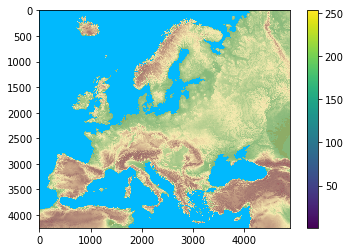

In [27]:
import matplotlib.pyplot as plt
import matplotlib.axes as ax
img = plt.imshow(im)
plt.colorbar(img)
# plt.imshow(im)

In [28]:
p = np.array(im)

In [12]:
from PIL import Image
import numpy as np
# import cv2
# img2 = Image.open('./Amazing_COL_2Fix.bmp')
# img1 = Image.open('./Amazing_RGB_2L.bmp')
# # img1 = img1.convert('RGBA')
img2 = im.convert('RGBA')
pixdata = img2.load()
for y in range(img2.size[1]):
    for x in range(img2.size[0]):
        if pixdata[x,y][0]==1 and pixdata[x,y][1]==185 and pixdata[x,y][2]==253:
            pixdata[x, y] = (255, 255, 255,0)


In [13]:
img2.show()

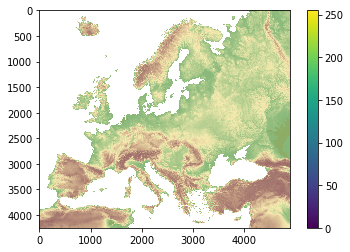

In [14]:
img3 = plt.imshow(img2)
plt.colorbar(img3)

In [15]:
fig=plt.figure()
v=np.linspace(-180,180,25)
x,y = np.meshgrid(v,v)
z = np.add(z,-shift)
z = z.reshape(25,25).T 
plt.contourf(x,y,z,25)
fig.suptitle(AA(prefix)+' Input Data Contour Map')
plt.xlabel('$\phi$ (deg)')
plt.ylabel('$\psi$ (deg)')
plt.xticks(np.arange(-180, 181, 30))
plt.yticks(np.arange(-180, 181, 30))                                
plt.colorbar()

NameError: name 'z' is not defined

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.colors as colors
colorlist = ['gray', 'aqua', '#0343df', 'lime']
cmaps = colors.LinearSegmentedColormap.from_list('mylist', colorlist, N=800)
im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cmaps)
fig.colorbar(im)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Make some illustrative fake data:

x = np.arange(0, np.pi, 0.1)
y = np.arange(0, 2 * np.pi, 0.1)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.sin(Y) * 10

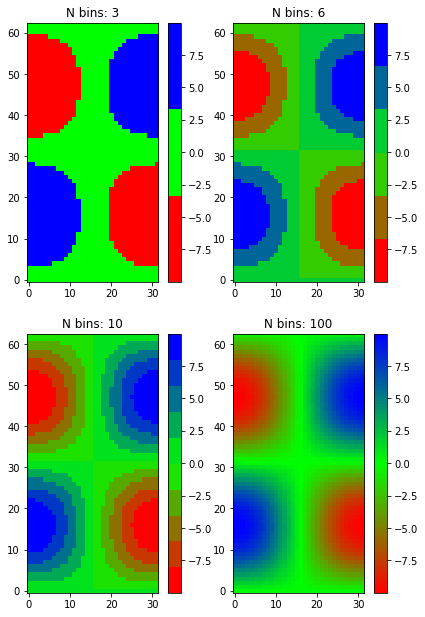

In [6]:
colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)

ValueError: RGBA values should be within 0-1 range

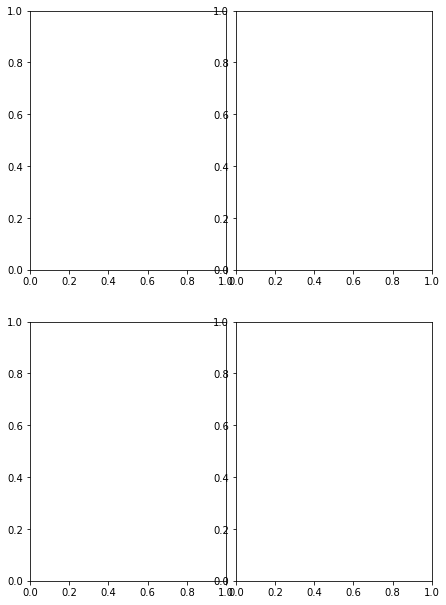

In [7]:
colors = [(246, 234, 175), (161, 116, 110), (238, 232, 172)]  # R -> G -> B
# n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=100)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)